In [5]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import ta
import matplotlib.pyplot as plt

ticker = 'RELIANCE.NS'
start_date = '2020-01-01'
end_date = '2024-12-31'
interval = '1d'

data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,693.978516,698.138733,688.263977,690.138306,672.876953,14004468
2020-01-02,691.235535,704.470520,691.235535,701.887512,684.332336,17710316
2020-01-03,700.835999,704.790527,696.264343,702.733276,685.156921,20984698
2020-01-06,694.892883,698.504456,684.835205,686.435303,669.266602,24519177
2020-01-07,694.435669,701.521790,691.921265,696.995850,679.562927,16683622
...,...,...,...,...,...,...
2024-10-23,1337.500000,1357.474976,1335.000000,1338.525024,1338.525024,17214742
2024-10-24,1335.275024,1343.699951,1323.125000,1339.800049,1339.800049,22155934
2024-10-25,1343.500000,1344.349976,1322.000000,1327.849976,1327.849976,18597496


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-10-23  1337.500000  1357.474976  1335.000000  1338.525024  1338.525024   
2024-10-24  1335.275024  1343.699951  1323.125000  1339.800049  1339.800049   
2024-10-25  1343.500000  1344.349976  1322.000000  1327.849976  1327.849976   
2024-10-28  1337.000000  1353.000000  1322.099976  1334.349976  1334.349976   
2024-10-29  1328.099976  1343.199951  1320.300049  1339.599976  1339.599976   

              Volume        EMA_1        EMA_2  
Date                                            
2024-10-23  17214742  1371.090091  1431.413684  
2024-10-24  22155934  1366.620085  1427.674352  
2024-10-25  18597496  1361.081498  1423.599887  
2024-10-28  10824350  1357.262709  1419.957034  
2024-10-29  10965891  1354.739461  1416.677154  


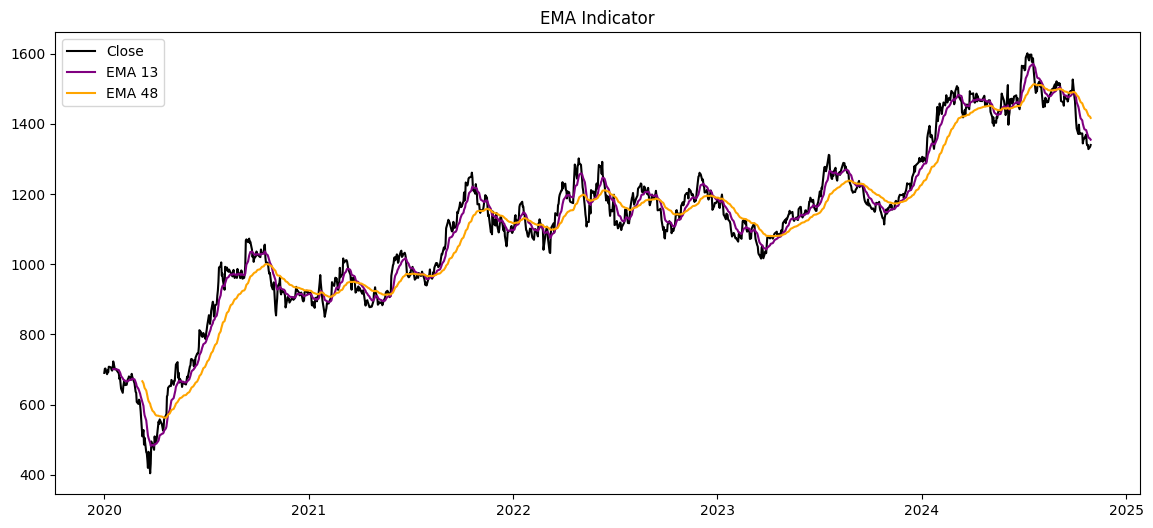

In [6]:
import ta 
import pandas_ta as ta

# Calculate the EMAs
data['EMA_1'] = ta.ema(data['Close'], length=13)
data['EMA_2'] = ta.ema(data['Close'], length=48)

print(data.tail())

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='Close', color='black')
plt.plot(data.index, data['EMA_1'], label='EMA 13', color='purple')
plt.plot(data.index, data['EMA_2'], label='EMA 48', color='orange')
plt.title('EMA Indicator')
plt.legend()
plt.show()

In [7]:
in_trade = False
buy_price = 0
sell_price = 0
trade_count = 0
total_profit = 0

buy_dates = []
buy_prices = []
sell_dates = []
sell_prices = []
profits = []

for index, row in data.iterrows():
    if not in_trade:
        # Entry conditions
        if row['EMA_1'] > row['EMA_2']:
            in_trade = True
            buy_price = row['Close']
            buy_dates.append(index.date())
            buy_prices.append(buy_price)
            print(f"Buy at {index.date()} - Price: {buy_price}")
    else:
        # Exit conditions
        if row['EMA_1'] > row['EMA_2']:
            sell_price = row['Close']
            profit = sell_price - buy_price
            total_profit += profit
            trade_count += 1
            sell_dates.append(index.date())
            sell_prices.append(sell_price)
            profits.append(profit)
            print(f"Sell at {index.date()} - Price: {sell_price} - Profit: {profit:.2f}")
            in_trade = False


min_length = min(len(buy_dates), len(buy_prices), len(sell_dates), len(sell_prices), len(profits))


df_trades = pd.DataFrame({
    'Buy Date': buy_dates[:min_length],
    'Buy Price': buy_prices[:min_length],
    'Sell Date': sell_dates[:min_length],
    'Sell Price': sell_prices[:min_length],
    'Profit': profits[:min_length]
})

df_trades.to_csv('trades_output.csv', index=False)

if trade_count > 0:
    avg_profit_per_trade = total_profit / trade_count
    print(f"\nTotal Trades: {trade_count}")
    print(f"Total Profit: {total_profit:.2f}")
    print(f"Average Profit per Trade: {avg_profit_per_trade:.2f}")
else:
    print("No trades executed based on the strategy.")

Buy at 2020-04-24 - Price: 647.8047485351562
Sell at 2020-04-27 - Price: 653.6336059570312 - Profit: 5.83
Buy at 2020-04-28 - Price: 652.9021606445312
Sell at 2020-04-29 - Price: 652.353515625 - Profit: -0.55
Buy at 2020-04-30 - Price: 670.2058715820312
Sell at 2020-05-04 - Price: 656.1251831054688 - Profit: -14.08
Buy at 2020-05-05 - Price: 667.760009765625
Sell at 2020-05-06 - Price: 667.8057861328125 - Profit: 0.05
Buy at 2020-05-07 - Price: 688.9268188476562
Sell at 2020-05-08 - Price: 714.00244140625 - Profit: 25.08
Buy at 2020-05-11 - Price: 720.8599243164062
Sell at 2020-05-12 - Price: 676.2633056640625 - Profit: -44.60
Buy at 2020-05-13 - Price: 690.6114501953125
Sell at 2020-05-14 - Price: 662.690673828125 - Profit: -27.92
Buy at 2020-05-15 - Price: 673.5128784179688
Sell at 2020-05-18 - Price: 664.9058837890625 - Profit: -8.61
Buy at 2020-05-19 - Price: 650.2070922851562
Sell at 2020-05-20 - Price: 661.65234375 - Profit: 11.45
Buy at 2020-05-21 - Price: 665.1366577148438
Sell

In [8]:
if not df_trades.empty:
    
    accuracy_rate = (df_trades['Profit'] > 0).sum() / len(df_trades)
    total_trades = len(df_trades)
    winning_trades = (df_trades['Profit'] > 0).sum()
    losing_trades = total_trades - winning_trades

    win_loss_ratio = winning_trades / max(1, losing_trades)
    profit_factor = abs(df_trades['Profit'][df_trades['Profit'] > 0].sum() / df_trades['Profit'][df_trades['Profit'] < 0].sum())
    
    print(f"\nAccuracy Rate: {accuracy_rate * 100:.2f}%")
    print(f"Total Trades: {total_trades}")
    print(f"Winning Trades: {winning_trades}")
    print(f"Losing Trades: {losing_trades}")
    print(f"Win/Loss Ratio: {win_loss_ratio:.2f}")
    print(f"Profit Factor: {profit_factor:.2f}")
else:
    print("No trades executed based on the strategy.")


Accuracy Rate: 52.91%
Total Trades: 327
Winning Trades: 173
Losing Trades: 154
Win/Loss Ratio: 1.12
Profit Factor: 1.30
